In [1]:
# Library imports
import matplotlib.pyplot as plt
import torch

# Repository imports
import FFBrainNet as ff
from DataGenerator import random_halfspace_data
from train import train_vanilla

## Train an FFBrainNet using regular gradient descent on all parameters:

In [2]:
X,y = random_halfspace_data(dim=4, n=100)
brain = ff.FFBrainNet(n=4, m=2, l=2, w=10, p=1.0, cap=10, full_gd=True)
losses = train_vanilla(X, y, brain, epochs=5, batch=10, lr=0.1)

INITIAL ACCURACY
Acc of class 0 :0.0000
Acc of class 1 :1.0000
epoch 0 Accuracy: 0.5200
Evaluating
Acc of class 0 :0.7500
Acc of class 1 :0.9615
epoch  1 Loss: 0.6577 Accuracy: 0.8600
Evaluating
Acc of class 0 :0.9792
Acc of class 1 :0.9615
epoch  2 Loss: 0.4576 Accuracy: 0.9700
Evaluating
Acc of class 0 :0.9792
Acc of class 1 :1.0000
epoch  3 Loss: 0.3591 Accuracy: 0.9900
Evaluating
Acc of class 0 :0.9792
Acc of class 1 :1.0000
epoch  4 Loss: 0.3368 Accuracy: 0.9900
Evaluating
Acc of class 0 :1.0000
Acc of class 1 :1.0000
epoch  5 Loss: 0.3303 Accuracy: 1.0000
Finished Training


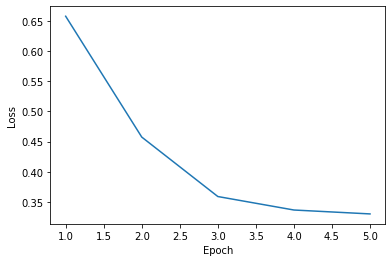

Last outer epoch loss: 0.330314949615296


In [3]:
# Plot learning curves
plt.plot(range(1, len(losses)+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print('Last outer epoch loss:', losses[-1])